<h1>SCM 516 Project</h1><br>
<h4>Team number: 22494</h4><br>
<h4>Name 1: SHIVANI PAUNIKAR</h4>
<h4>Name 2: PRANEETH PARTHASARATHY</h4>
<h4>Name 3: KATIE RUDOFF</h4>
<h4>Name 4: SHREYAS JOSHI</h4>
<h4>Name 5: SAMARTH SURENDRA</h4>

<br><h4>Professor: Dr. Mohsen Hosseini</h4>

<h1>Naive Bayes</h1>

In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
df=pd.read_csv('fetal_health.csv')
df.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
X=df.drop('fetal_health', axis=1)
y=df.loc[:,'fetal_health']
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y, test_size=0.3, random_state=0) 

In [5]:
model=GaussianNB()
model.fit(Xtrain,ytrain)

GaussianNB()

In [6]:
ypred=model.predict(Xtest)
ypred

array([1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 3., 1.,
       1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2., 2., 1., 2., 1., 2.,
       1., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 3., 1., 1.,
       1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 2., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2.,
       2., 3., 2., 1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 2., 2., 3., 1.,
       2., 1., 1., 3., 1., 2., 1., 2., 2., 2., 3., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 2., 1., 2., 3., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 3., 2., 1., 3., 2., 3., 3., 2.,
       1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 2.,
       1., 3., 1., 1., 1.

In [7]:
model.score(Xtrain,ytrain)

0.8205645161290323

In [8]:
model.score(Xtest,ytest)

0.8025078369905956

In [9]:
cm=confusion_matrix(ypred, ytest)
cm

array([[404,  13,   2],
       [ 74,  69,  17],
       [ 16,   4,  39]], dtype=int64)

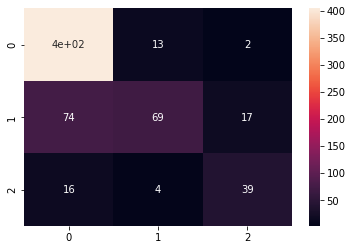

In [10]:
sns.heatmap(cm, annot=True);

In [11]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.82      0.96      0.88       419
         2.0       0.80      0.43      0.56       160
         3.0       0.67      0.66      0.67        59

    accuracy                           0.80       638
   macro avg       0.76      0.69      0.70       638
weighted avg       0.80      0.80      0.78       638



<h1>KNN Classification</h1>

## Not Standardized

In [16]:
## import packages
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# fit the model to Xtrain and ytrain
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [18]:
# predict the 'Outcome' for Xtest
ypred = model.predict(Xtest)

### a) What is model score for training data?


In [19]:
model.score(Xtrain, ytrain)

0.9220430107526881

### b) What is model score for testing data?


In [21]:
model.score(Xtest, ytest)

0.8887147335423198

### c) Show confusion matrix using seaborn heatmap 

In [22]:
# compare predicted outcome to actual outcome
cm = confusion_matrix(ypred, ytest)

cm

array([[474,  35,   7],
       [ 17,  49,   7],
       [  3,   2,  44]], dtype=int64)

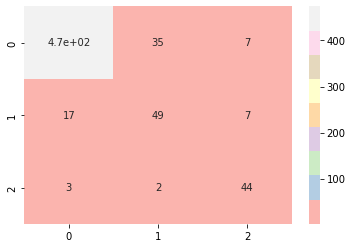

In [23]:
# plot the confusion matrix
sns.heatmap(cm,annot = True, cmap='Pastel1');

### d) Print classification report metrics

In [24]:
# compare ypred and ytest
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94       516
         2.0       0.57      0.67      0.62        73
         3.0       0.76      0.90      0.82        49

    accuracy                           0.89       638
   macro avg       0.76      0.83      0.79       638
weighted avg       0.90      0.89      0.89       638



## KNN - Standardized

In [25]:
# Data standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on Xtrain
scaler.fit(Xtrain)

# Scale both Xtrain and Xtest
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [26]:
columns_names=['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']

scaled_df = pd.DataFrame(Xtrain, columns = columns_names) 

In [27]:
# display first 5 rows
scaled_df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -0.440739       0.213163       -0.199910             -1.131370   
1        0.882298      -0.047467        0.924385             -0.793322   
2       -1.458459       1.255680       -0.199910              0.220822   
3       -0.746055       1.255680        0.699526              0.220822   
4        0.882298      -0.568726       -0.199910              0.220822   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.633922             -0.058065                 -0.261120   
1             1.387383             -0.058065                  1.465755   
2            -0.297038             -0.058065                 -0.261120   
3            -0.633922             -0.058065                 -0.261120   
4             3.408688             -0.058065                 -0.261120   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                        -1.160425                             -0.138985   
1                         1.103621                              2.292712   
2                        -0.986267                              0.555785   
3                        -0.289638                              0.208400   
4                        -1.392634                              2.640097   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                          -0.481219       ...   
1                                          -0.535552       ...   
2                                          -0.535552       ...   
3                                          -0.535552       ...   
4                                          -0.535552       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.276249       0.150928      -0.350562                  -0.362500   
1         1.097661      -0.901213       0.891429                   0.991076   
2         1.512427      -0.833333       1.907603                   1.667864   
3         1.979038      -1.444253       1.907603                   1.667864   
4         1.901269      -1.478193       1.681787                   2.683045   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.473265       -0.290589       -0.114312   
1                   -0.473265        0.203932       -1.535012   
2                   -0.473265       -0.352404       -0.178889   
3                   -0.473265       -0.290589        0.079420   
4                    1.067693        0.327562       -0.501776   

   histogram_median  histogram_variance  histogram_tendency  
0         -0.302120           -0.505509           -0.534699  
1          0.606212            2.422784            1.105780  
2         -0.232248            0.039290           -0.534699  
3         -0.302120           -0.199059           -0.534699  
4         -0.232248            1.809886           -0.534699  

[5 rows x 21 columns]

In [28]:
# fit the model to Xtrain and ytrain
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [29]:
# predict the 'Outcome' for Xtest
ypred = model.predict(Xtest)

### a) What is the model score for training data?

In [30]:
model.score(Xtrain, ytrain)

0.9986559139784946

### b) What is the model score for testing data?


In [31]:
model.score(Xtest, ytest)

0.8949843260188087

### c) Show confusion matrix using seaborn heatmap 


In [32]:
# compare predicted outcome to actual outcome
cm = confusion_matrix(ypred, ytest)

cm

array([[470,  24,   3],
       [ 22,  55,   9],
       [  2,   7,  46]], dtype=int64)

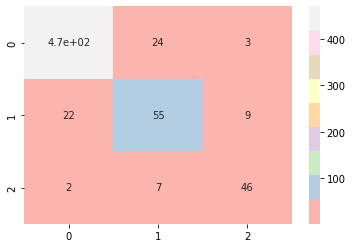

In [33]:
# plot the confusion matrix
sns.heatmap(cm,annot = True, cmap='Pastel1');

### d) Print classification report metrics


In [34]:
# compare ypred and ytest
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       497
         2.0       0.64      0.64      0.64        86
         3.0       0.79      0.84      0.81        55

    accuracy                           0.89       638
   macro avg       0.79      0.81      0.80       638
weighted avg       0.90      0.89      0.90       638



## Optimal K Value

In [35]:
# read in dataset
df2 = pd.read_csv('fetal_health.csv')

### c) Plot K-value versus MAE

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error   

error = []

# calculating MAE error for K values between 1 and 30
for i in range(1, 31):   # i=1, 2, 3,   ..., 30
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    mae = mean_absolute_error(ytest, pred_i)
    error.append(mae)

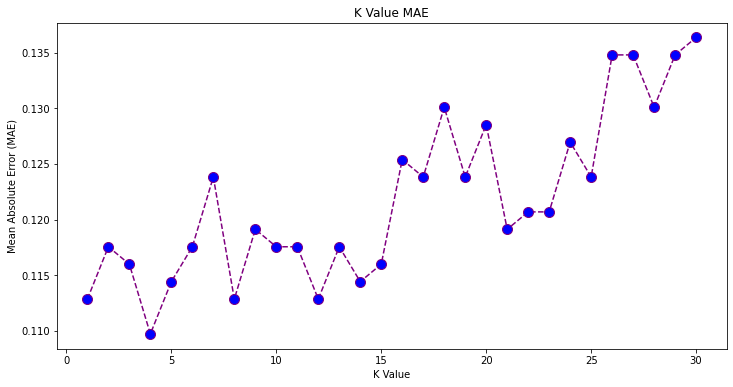

In [37]:
# plot k values versus error
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))   

plt.plot(range(1, 31), error, color='purple', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error (MAE)'); 

In [38]:
minval = min(error)
minid = error.index(minval)
print("Best value of K value based on MAE: ", minid+1)

Best value of K value based on MAE:  4


### d) Plot K-value versus MSE

In [39]:
error2 = []

# Calculating MSE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    mse = mean_squared_error(ytest, pred_i)
    error2.append(mse)

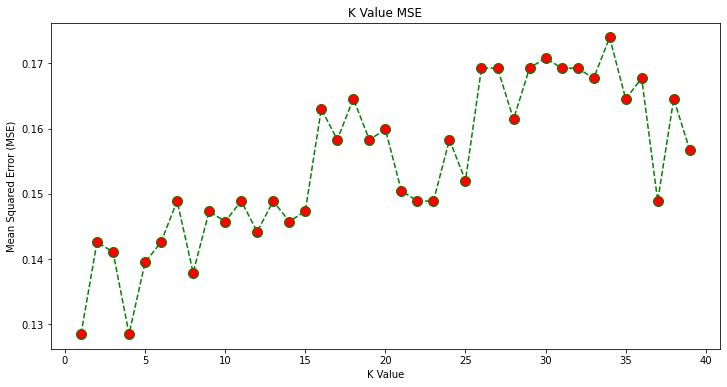

In [40]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), error2, color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
         
plt.title('K Value MSE')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)');  

In [41]:
minval = min(error2)

minid = error2.index(minval)

print("Best value of K value based on MSE: ", minid+1)

Best value of K value based on MSE:  1


<h1>Decision Tree</h1>

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions
import graphviz

In [48]:
df=pd.read_csv(r'fetal_health.csv')
X=df[['histogram_mean', 'histogram_median']]
y=df['fetal_health'].astype(int)
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size=0.3, random_state=0)
clf_model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=0)
clf_model.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [49]:
Xcombined = np.vstack([Xtrain, Xtest])
ycombined = np.hstack ([ytrain, ytest])

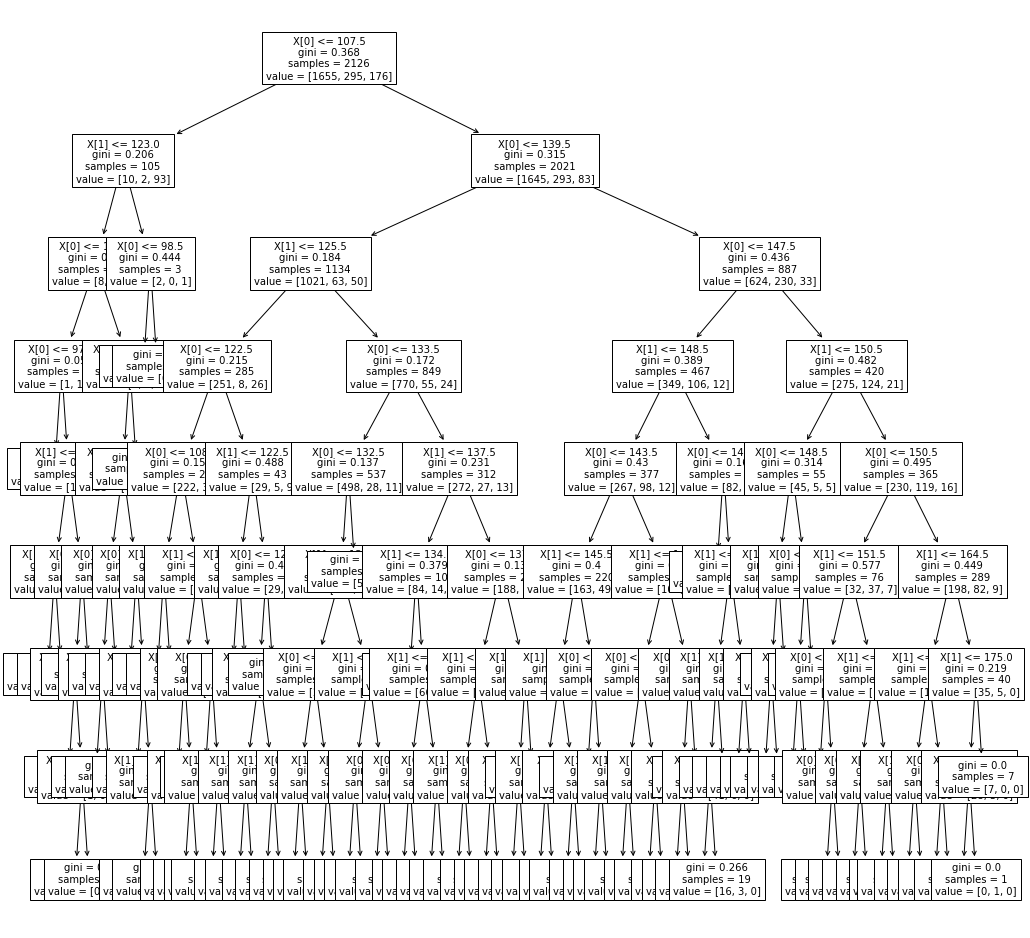

In [51]:
clf_model.fit(Xcombined, ycombined)

from sklearn import tree
 
plt.subplots(figsize=(17, 17))
tree.plot_tree(clf_model, fontsize=10)
plt.show()

<h1>Plots</h1>

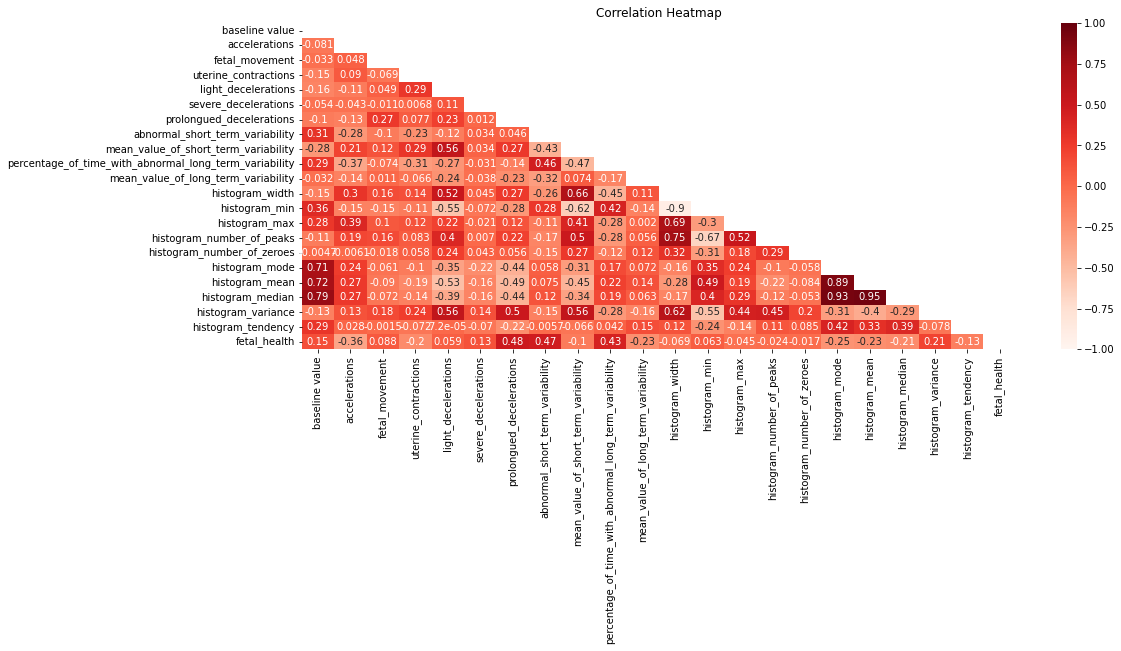

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, mask=mask, annot=True, cmap='Reds')

heatmap.set_title('Correlation Heatmap');

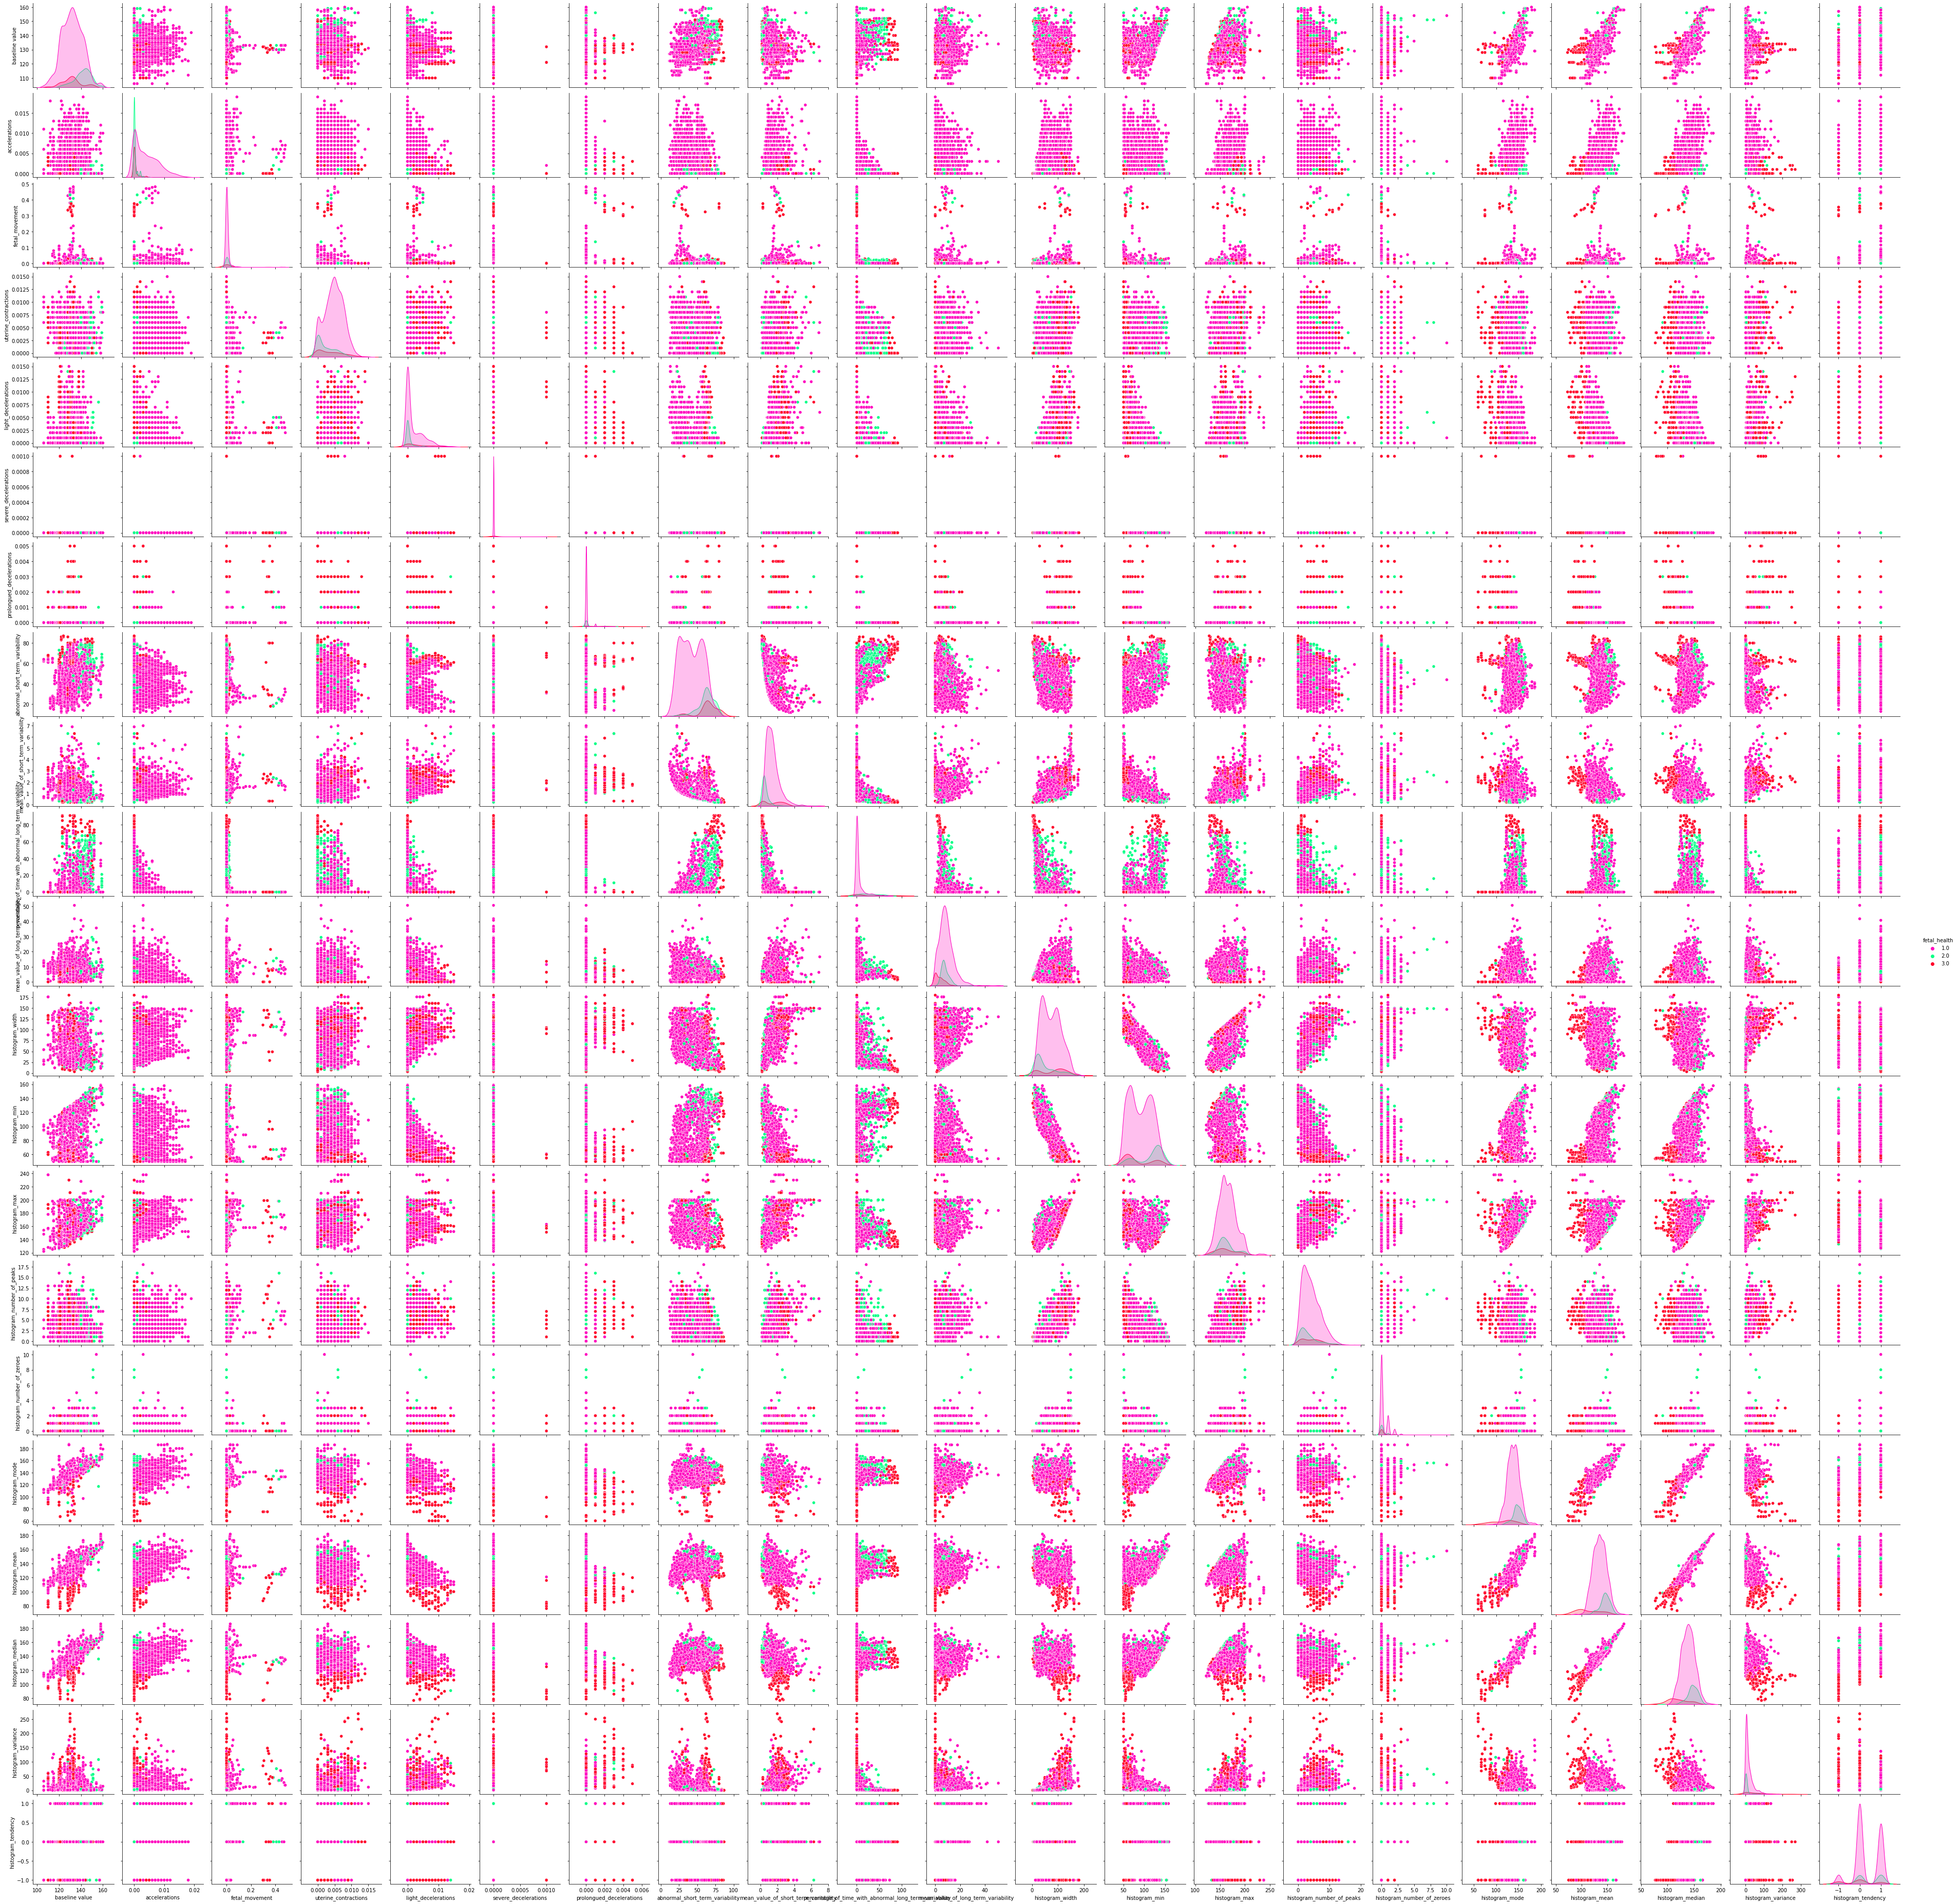

In [54]:
sns.pairplot(data=df, hue="fetal_health", palette='gist_rainbow_r');

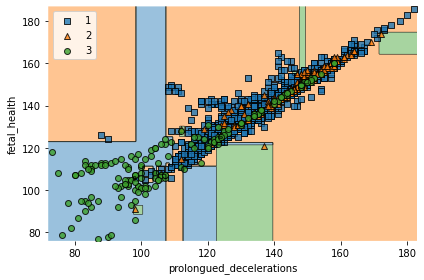

In [55]:
plot_decision_regions(Xcombined, ycombined, clf=clf_model)
plt.xlabel('prolongued_decelerations')
plt.ylabel('fetal_health')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();

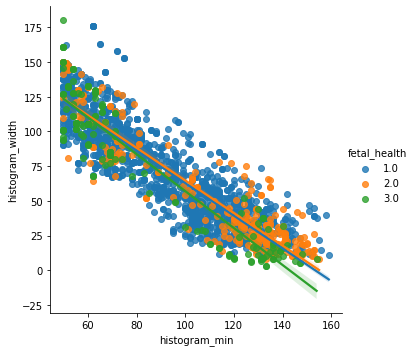

In [56]:
sns.lmplot(data=df, x='histogram_min', y='histogram_width', hue='fetal_health');

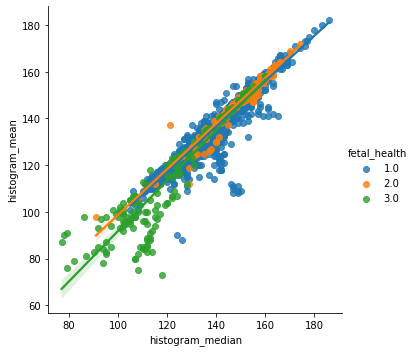

In [57]:
sns.lmplot(data=df, x='histogram_median', y='histogram_mean', hue='fetal_health');